# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the two drug treatment plans that have the lowest variance and SEM. These two treatments as well have a lower distribution of final tumor volumes.
- There seems to be a positive correlation between Mouse weight and drug effectiveness in reducing Tumor. As the average weight increases the average tumor size increases. This could indicate that the drugs are less effective on heavier mice.
- There is one outlier in the study of final tumor volumes. Infubinol produced one sample with final measurements far below the lower bounds, but upon inspection this mouse only had two readings. Would likely want further data to ensure accurate data. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_of_mice = len(merge_df["Mouse ID"].unique())
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merge_df.loc[merge_df['Mouse ID'] == 'g989',:]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_cleaned = merge_df.loc[merge_df['Mouse ID'] != 'g989',:]
merge_df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_cleaned = len(merge_df_cleaned["Mouse ID"].unique())
num_of_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = merge_df_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume = merge_df_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
volume_variance = merge_df_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
volume_std = merge_df_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
volume_sem = merge_df_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame ({"Mean Tumor Volume":mean_volume,
                              "Median Tumor Volume":median_volume,
                              "Tumor Volume Variance":volume_variance,
                              "Tumor Volume Std. Dev":volume_std,
                              "Tumor Volume Std. Err.":volume_sem})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregate = merge_df_cleaned.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#generate requested data set. Number of timepoints grouped by Drug Regimen
mice_count_by_drug = merge_df_cleaned.groupby(["Drug Regimen"]).count()["Timepoint"]
mice_count_by_drug = mice_count_by_drug.sort_values(ascending=False)
drug_regimen = merge_df_cleaned["Drug Regimen"].unique()
x_axis = np.arange(len(drug_regimen))

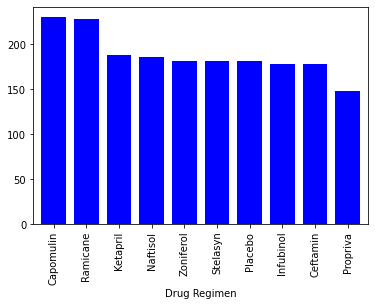

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_mouse_plot = mice_count_by_drug.plot(kind="bar",color="blue", width = .75)

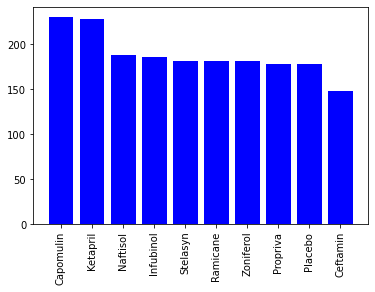

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, mice_count_by_drug, color="blue", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen,rotation=90)
plt.show()

In [12]:
#Dataset up for pie charts
#pair down master data to unique mice
unique_mice_df = merge_df_cleaned.drop_duplicates(['Mouse ID'], keep='first')
unique_mice_df 
#count unique mice by Sex, convert to dataframe
sex_distribution = unique_mice_df.groupby(["Sex"]).count()["Mouse ID"]
#sex_distribution.to_frame()

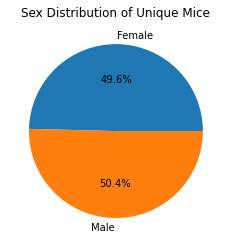

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_sex_distribution = sex_distribution.plot(kind="pie",autopct='%.1f%%', title ="Sex Distribution of Unique Mice")
plt.ylabel(None)
plt.show()

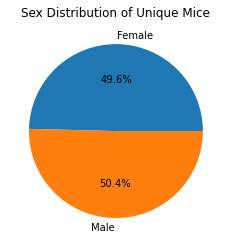

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels = sex_distribution.index.values, autopct="%.1f%%")
plt.title("Sex Distribution of Unique Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# narrow down data set to specific 4 treatments
tumor_analysis_df = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#put greatest (most recent) timepoint at top of list
tumor_analysis_df = tumor_analysis_df.sort_values("Timepoint", ascending=False)
#dropped rows for all prior timepoints, leaving only the final measurement for each mouse
latest_tumor_measurement_df = tumor_analysis_df.drop_duplicates(['Mouse ID'], keep='first')
#narrowed down columns
latest_tumor_measurement_df = latest_tumor_measurement_df[["Mouse ID","Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
latest_tumor_measurement_df.set_index("Mouse ID")

,Timepoint,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,
m601,45,28.430964,Capomulin
s185,45,23.343598,Capomulin
y865,45,64.729837,Ceftamin
x581,45,64.634949,Ceftamin
l897,45,38.846876,Capomulin
...,...,...,...
m756,5,47.010364,Infubinol
b447,0,45.000000,Ceftamin
t573,0,45.000000,Ceftamin


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_tumor_df = pd.merge(latest_tumor_measurement_df,merge_df_cleaned, on=("Mouse ID", "Timepoint"), how="inner")
clean_merge_tumor_df =merge_tumor_df[["Mouse ID","Timepoint", "Tumor Volume (mm3)_x", "Drug Regimen_x"]]
clean_merge_tumor_df = clean_merge_tumor_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume (mm3)","Drug Regimen_x":"Drug Regimen"})
clean_merge_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,m601,45,28.430964,Capomulin
1,s185,45,23.343598,Capomulin
2,y865,45,64.729837,Ceftamin
3,x581,45,64.634949,Ceftamin
4,l897,45,38.846876,Capomulin
...,...,...,...,...
95,m756,5,47.010364,Infubinol
96,b447,0,45.000000,Ceftamin
97,t573,0,45.000000,Ceftamin
98,u153,0,45.000000,Ceftamin


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
def get_treatment_data(treatment):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_merge_tumor_df.loc[clean_merge_tumor_df["Drug Regimen"] == treatment,["Mouse ID","Tumor Volume (mm3)"]]
    
    #if valid treatment called in function
    if len(treatment_data)>0:
    
        # add subset 
        tumor_vol_data.append(treatment_data["Tumor Volume (mm3)"])
    
        # Determine outliers using upper and lower bounds
        q1 = treatment_data.quantile(.25)
        median = treatment_data.quantile(.50)
        q3 = treatment_data.quantile(.75)
        iqr = q3-q1
        lower_bound = q1-(1.5*iqr)
        lower_bound =float(lower_bound)
        upper_bound = q3+(1.5*iqr)
        upper_bound = float(upper_bound)
        
        #print quartile/outlier summary
        print(f"{treatment}")
        print(f"Q1 = {q1}")
        print(f"Q3 = {q3}")
        print(f"The Interquartile Range = {iqr}")
        print(f"The Lower Bound = {lower_bound}")
        print(f"The Upper Bound = {upper_bound}")

        #detect if tumor volume is outside the upper/lower bounds
        outliers = treatment_data.loc[(treatment_data["Tumor Volume (mm3)"] < lower_bound) | (treatment_data["Tumor Volume (mm3)"] > upper_bound)]
       
        #if no outliers found
        if len(outliers) == 0 :
            print("No potential Outliers detected in this data set")
        
        #else, if outliers found and below lower bound
        elif len(outliers) > 0 & (outliers["Tumor Volume (mm3)"].any() < lower_bound):
            print(f"The following data point is a potential outlier : Mouse ID {outliers.values} is less than the Lower Bound of {lower_bound}")
        
        #else, if outliers found and above upper bound
        elif len(outliers) > 0 & outliers["Tumor Volume (mm3)"].any() > upper_bound:
            print(f"The following data point is a potential outlier : {outliers.values} is greater the Lower Bound of {upper_bound}")
        print("-----------------------")
        
    #if invalid treatment called in function
    else:
        print(f"We do not have dataset available for Treatment: {treatment}")

#loop through treatments and get treatment data.
for treatment in treatments:
    get_treatment_data(treatment)


Capomulin
Q1 = Tumor Volume (mm3)    32.377357
Name: 0.25, dtype: float64
Q3 = Tumor Volume (mm3)    40.15922
Name: 0.75, dtype: float64
The Interquartile Range = Tumor Volume (mm3)    7.781863
dtype: float64
The Lower Bound = 20.70456164999999
The Upper Bound = 51.83201549
No potential Outliers detected in this data set
-----------------------
Ramicane
Q1 = Tumor Volume (mm3)    31.56047
Name: 0.25, dtype: float64
Q3 = Tumor Volume (mm3)    40.659006
Name: 0.75, dtype: float64
The Interquartile Range = Tumor Volume (mm3)    9.098537
dtype: float64
The Lower Bound = 17.912664470000003
The Upper Bound = 54.30681135
No potential Outliers detected in this data set
-----------------------
Infubinol
Q1 = Tumor Volume (mm3)    54.048608
Name: 0.25, dtype: float64
Q3 = Tumor Volume (mm3)    65.525743
Name: 0.75, dtype: float64
The Interquartile Range = Tumor Volume (mm3)    11.477135
dtype: float64
The Lower Bound = 36.83290494999999
The Upper Bound = 82.74144559000001
The following data poin

In [94]:
outlier_analyze = tumor_analysis_df.loc[tumor_analysis_df["Mouse ID"] == "c326",:]
outlier_analyze

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
214,c326,5,36.321346,0,Infubinol,Female,18,25
213,c326,0,45.000000,0,Infubinol,Female,18,25


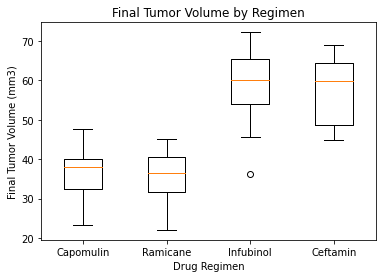

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()

## Line Plots

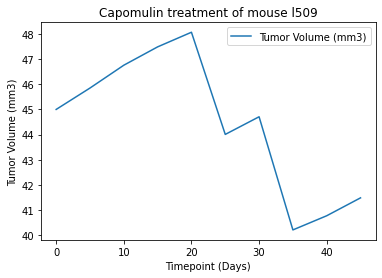

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


def get_treatment_lineplot(treatment, mouseID):
    #pull data set for treatment drug based on function input
    treatment_data = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"] == treatment]
    #pull data for specific specifimen within treatment data
    mouse_data =  treatment_data.loc[treatment_data["Mouse ID"] == mouseID]
    
    #if mouse ID provided is within the data set for that treatment drug
    if len(mouse_data)>0:
        mouse_plot_data = mouse_data[["Timepoint","Tumor Volume (mm3)"]]
        mouse_plot_data.set_index('Timepoint')
        
        mouse_plot = mouse_plot_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
        mouse_plot.set_xlabel("Timepoint (Days)")
        mouse_plot.set_ylabel("Tumor Volume (mm3)")
        mouse_plot.set_title(f"{treatment} treatment of mouse {mouseID}")
        plt.show()
        
    #mouse ID and Treatment drug combination not valid/not found in dataset
    else:
        print("Invalid combination of Treatment Drug and Mouse ID")
        
get_treatment_lineplot("Capomulin", "l509")

## Scatter Plot With Correlation and Regression

In [93]:
treatment_data = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"] == "Capomulin"]

averages =treatment_data.groupby(["Mouse ID"]).mean()
        
x_values = averages["Weight (g)"]
y_values = averages["Tumor Volume (mm3)"]


In [81]:
# Generate a scatter plot data of average tumor volume vs. mouse weight for the specified regimen
def get_treatment_scatter(treatment):
    treatment_data = merge_df_cleaned.loc[merge_df_cleaned["Drug Regimen"] == treatment]
    if len(treatment_data)>0:
        averages =treatment_data.groupby(["Mouse ID"]).mean()
        
        x_values = averages["Weight (g)"]
        y_values = averages["Tumor Volume (mm3)"]
        return x_values, y_values

    else:
        print(f"We do not have dataset available for Treatment: {treatment}")

In [91]:
# Generate a regression and correlation data of average tumor volume vs. mouse weight for the specified regimen
def get_regression_model(treatment,x_values,y_values):       
        
        #determine and print correlation coefficient
        x_values,y_values = get_treatment_scatter(treatment)

        correlation = st.pearsonr(x_values,y_values)
        print(f"The Correlation coefficient is {(correlation[0])}")
        
        #determine and display linear regression model
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        return (slope, intercept, rvalue, pvalue, stderr), regress_values

The Correlation coefficient is 0.8419363424694717


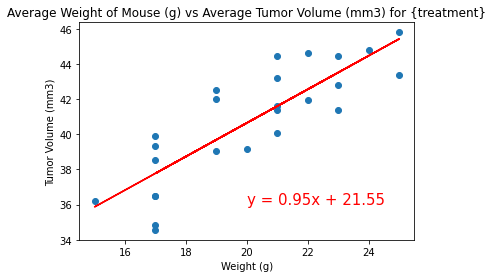

In [92]:
def plot_scatter_data(treatment):
        #plot scatter data points
        x_values,y_values = get_treatment_scatter(treatment)
        scatter_plot = plt.scatter(x_values,y_values)
        plt.xlabel('Weight (g)')
        plt.ylabel('Tumor Volume (mm3)')
        plt.title("Average Weight of Mouse (g) vs Average Tumor Volume (mm3) for {treatment}")
        
        (slope, intercept, rvalue, pvalue, stderr),regress_values = get_regression_model(treatment,x_values,y_values)
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(20,36),fontsize=15,color="red")
        plt.show()
        

    
plot_scatter_data("Capomulin")